In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/src')
from config import system as config_sys
from helpers.data_bern_numpy_to_preprocessed_hdf5 import interpolate_and_slice

In [3]:
# Example of image size
x_dim = 160
y_dim = 110
z_dim = 48
t_dim = 25

# Create the 3D fields
x_field = - np.ones((x_dim, y_dim, z_dim))  
y_field = np.ones((x_dim, y_dim, z_dim))
z_field = -np.ones((x_dim, y_dim, z_dim))*0.5

# Combine the fields into a single 4D array
vector_field = np.stack((x_field, y_field, z_field), axis=-1)
vector_field = np.ones((x_dim, y_dim, z_dim, 3))

vector_field.shape

(160, 110, 48, 3)

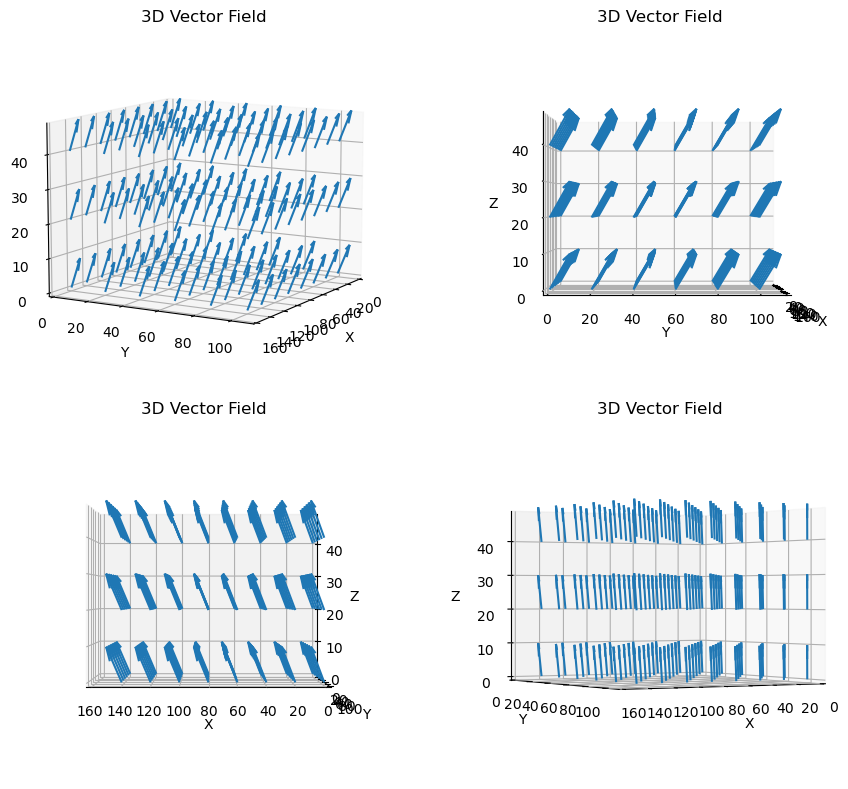

In [4]:
# Visualize the vector field

U_vf = vector_field[:,:,:,0]
V_vf = vector_field[:,:,:,1]
W_vf = vector_field[:,:,:,2]

# Define the subsampling rate
n = 20

# Create a subsampled meshgrid for the coordinates
x_vf = np.linspace(0, vector_field.shape[0] - 1,vector_field.shape[0])[::n]
y_vf = np.linspace(0, vector_field.shape[1] - 1,vector_field.shape[1])[::n]
z_vf = np.linspace(0, vector_field.shape[2] - 1,vector_field.shape[2])[::n]
X_vf, Y_vf, Z_vf = np.meshgrid(x_vf, y_vf, z_vf, indexing='ij')

# Subsample the vector components
U_sub_vf = U_vf[::n, ::n, ::n]
V_sub_vf = V_vf[::n, ::n, ::n]
W_sub_vf = W_vf[::n, ::n, ::n]

# Function to set common properties
def set_common_properties(ax, elev, azim):
    ax.quiver(X_vf, Y_vf, Z_vf, U_sub_vf, V_sub_vf, W_sub_vf, length=10, normalize=False)
    ax.set_title('3D Vector Field')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 160])
    ax.set_ylim([0, 110])
    ax.set_zlim([0, 48])
    ax.view_init(elev, azim)

fig = plt.figure(figsize=(10, 8))

# 1st subplot: Default 3D view
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
set_common_properties(ax1, 10, 30)

# 2nd subplot: View Z,Y plane (rotate to see from the side)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
set_common_properties(ax2, 0, 0)

# 3rd subplot: View X,Z plane (rotate to see from the top)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
set_common_properties(ax3, 0, 90)

# 4th subplot: Another angle for better visualization
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
set_common_properties(ax4, 0, 60)

plt.tight_layout()
plt.show()


In [5]:
# Define the start and end points of the line
x_start, y_start, z_start = 55, 40, 20
x_end, y_end, z_end = 70, 70, 40
start_point = np.array([x_start, y_start, z_start])
end_point = np.array([x_end, y_end, z_end])

num_points = 29
# Create arrays of points for x, y, and z
x_points = np.linspace(start_point[0], end_point[0], num_points, dtype=int)
y_points = np.linspace(start_point[1], end_point[1], num_points, dtype=int)
z_points = np.linspace(start_point[2], end_point[2], num_points, dtype=int)

# Combine the x, y, and z points into a single array
points = np.column_stack((x_points, y_points, z_points))
points = points[2:-2]
coords = points.copy()



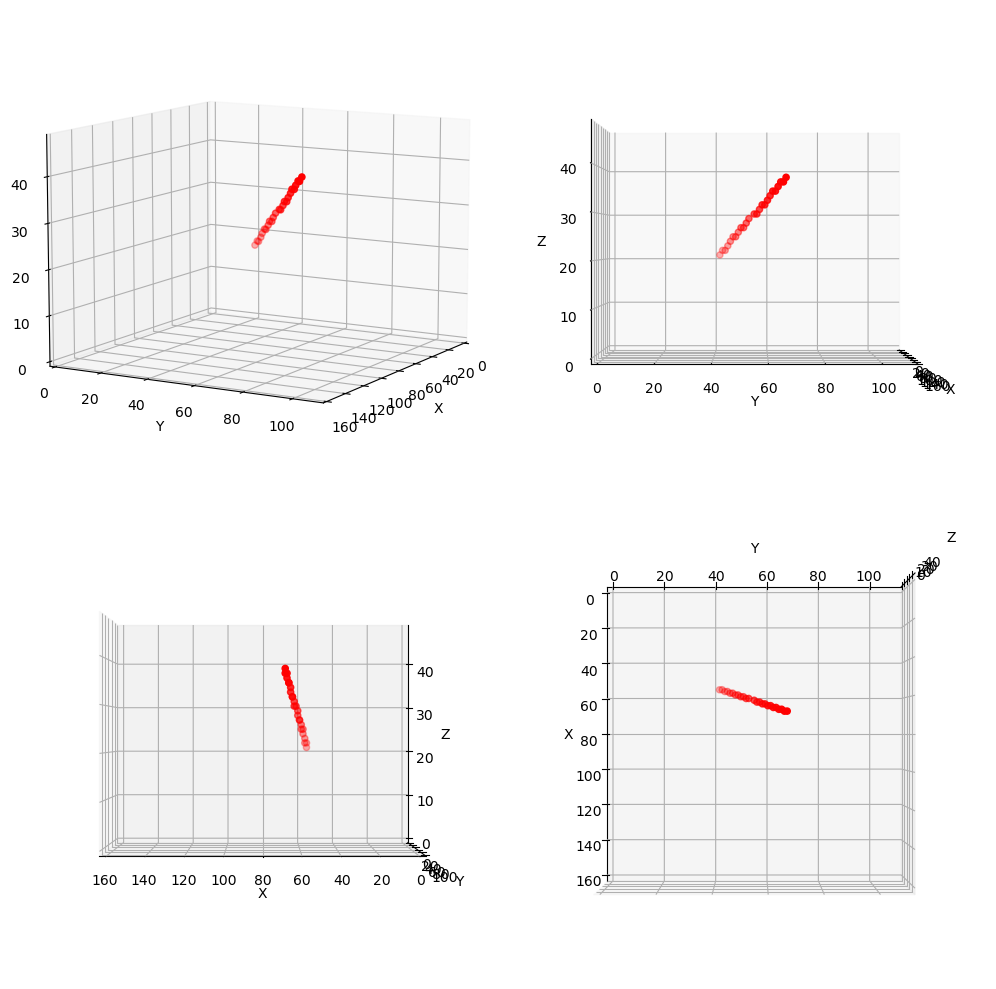

In [6]:
# Extracting x, y, z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Function to set common properties
def set_common_properties(ax):
    ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlim([0, 160])
    ax.set_ylim([0, 110])
    ax.set_zlim([0, 48])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Creating a 2x2 subplot
fig = plt.figure(figsize=(10, 10))

# 1st subplot: Default 3D view
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
set_common_properties(ax1)
ax1.view_init(10, 30)

# 2nd subplot: View Z,Y plane (rotate to see from the side)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
set_common_properties(ax2)
ax2.view_init(0, 0)

# 3rd subplot: View X,Z plane (rotate to see from the top)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
set_common_properties(ax3)
ax3.view_init(0, 90)

# 4th subplot: Another angle for better visualization
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
set_common_properties(ax4)
ax4.view_init(90, 0, 0)

plt.tight_layout()
plt.show()

In [7]:
# Slicing operation 
straightened_image = 0
del straightened_image
temp_for_channel_stacking = []
common_image_shape = [30, 30, 64, 3]

for channel in range(vector_field.shape[3]):

    slice_dict = interpolate_and_slice(vector_field[:,:,:,channel], coords, common_image_shape)

    temp_for_channel_stacking.append(slice_dict['straightened'])

straightened_image = np.stack(temp_for_channel_stacking, axis=-1)

print(straightened_image.shape)
# Channel with non zero component
np.unique((np.where(straightened_image != 0)[-1]))

(30, 30, 64, 3)


array([0, 1, 2])

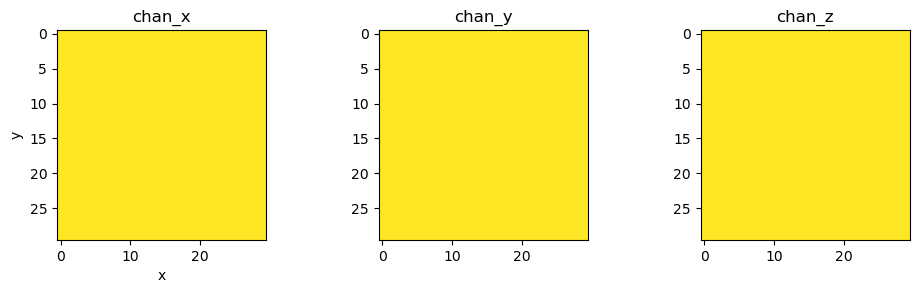

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))  # Adjusted figsize for better layout
z_along_aorta = 10
axs[0].imshow(straightened_image[:,:, z_along_aorta,0], vmin=0, vmax=1)
axs[0].set_title('chan_x')

axs[1].imshow(straightened_image[:,:, z_along_aorta,1], vmin=0, vmax=1)
axs[1].set_title('chan_y')

axs[2].imshow(straightened_image[:,:, z_along_aorta,2], vmin=0, vmax=1)
axs[2].set_title('chan_z')

# Set axis labels
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')  
plt.tight_layout()
plt.show()


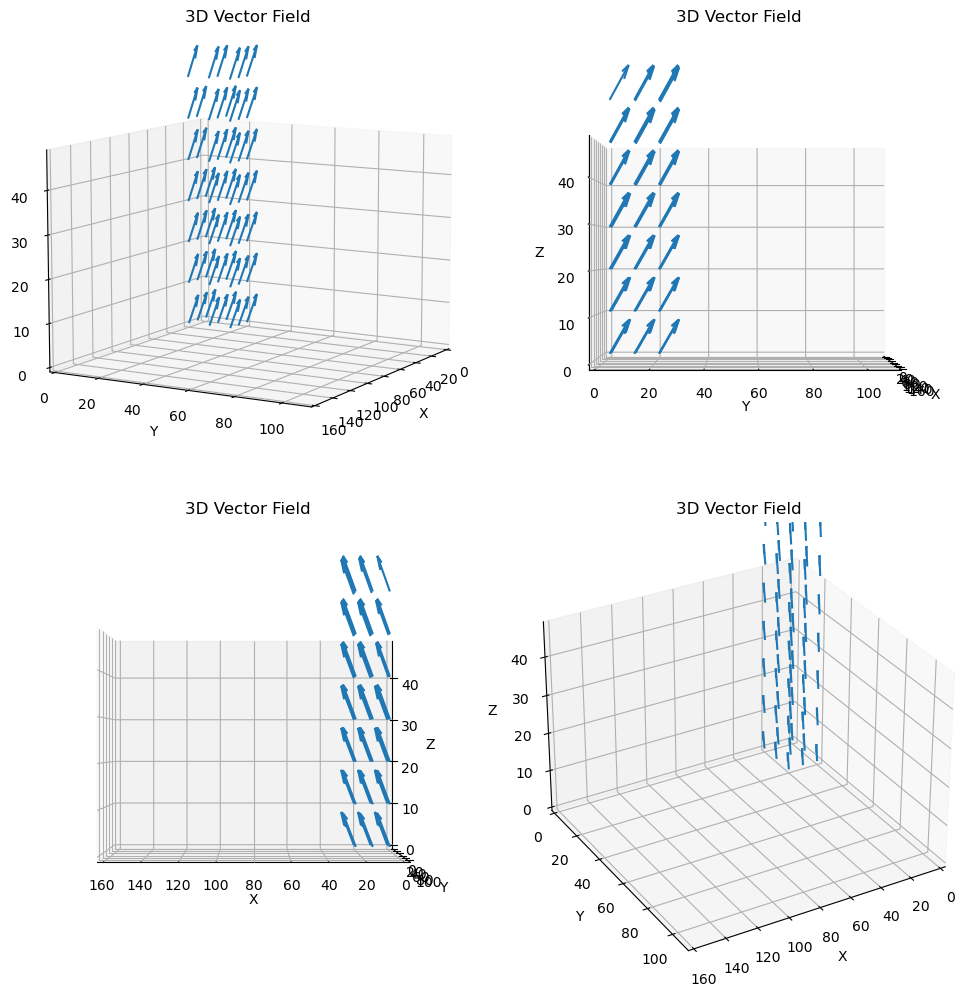

In [9]:

U = straightened_image[:,:,:,0]
V = straightened_image[:,:,:,1]
W = straightened_image[:,:,:,2]

# Define the subsampling rate
n = 10

# Create a subsampled meshgrid for the coordinates
x = np.linspace(0, straightened_image.shape[0] -1, straightened_image.shape[0])[::n]
y = np.linspace(0, straightened_image.shape[1] -1, straightened_image.shape[1])[::n]
z = np.linspace(0, straightened_image.shape[2] -1, straightened_image.shape[2])[::n]
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Subsample the vector components
U_sub = U[::n, ::n, ::n]
V_sub = V[::n, ::n, ::n]
W_sub = W[::n, ::n, ::n]
# Function to set common properties
def set_common_properties(ax, elev, azim):
    ax.quiver(X, Y, Z, U_sub, V_sub, W_sub, length=8, normalize=False)
    ax.set_title('3D Vector Field')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 160])
    ax.set_ylim([0, 110])
    ax.set_zlim([0, 48])
    ax.view_init(elev, azim)

# Creating a 2x2 subplot
fig = plt.figure(figsize=(10, 10))

# 1st subplot: Default 3D view
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
set_common_properties(ax1,10, 30)


# 2nd subplot: View Z,Y plane (rotate to see from the side)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
set_common_properties(ax2, 0, 0)


# 3rd subplot: View X,Z plane (rotate to see from the top)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
set_common_properties(ax3, 0, 90)


# 4th subplot: Another angle for better visualization
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
set_common_properties(ax4, 30, 60)


plt.tight_layout()
plt.show()

In [10]:
def rotate_vectors(vectors, rotation_matrix):
    """
    Rotates a 2D array of 3D vectors using a 3D rotation matrix.
    """
    # Reshape the vectors array for matrix multiplication
    vectors_flat = vectors.reshape(-1, 3)
    vectors_flat[:, [0, 2]] = vectors_flat[:, [2, 0]]
    rotated_vectors_flat = np.dot(rotation_matrix, vectors_flat.T).T
    
    # Reshape back to original shape
    rotated_vectors = rotated_vectors_flat.reshape(vectors.shape)
    #rotated_vectors = rotated_vectors * [1,1,-1] # We don't need this anymore 
    
    return rotated_vectors


def rotate_vectors_with_swapping(vectors, rotation_matrix):
    """
    Rotates a 2D array of 3D vectors using a 3D rotation matrix.
    Switches the x and z axes before applying the rotation.
    """
    # Reshape the vectors array for matrix multiplication
    vectors_flat = vectors.reshape(-1, 3)
    
    
    # Switch x and z axes
    vectors_flat[:, [0, 2]] = vectors_flat[:, [2, 0]]
    P = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])
    rotation_matrix = P @ rotation_matrix @ P.T
    
    # Apply the rotation matrix
    rotated_vectors_flat = np.dot(rotation_matrix, vectors_flat.T).T
    
    # Reshape back to original shape
    rotated_vectors = rotated_vectors_flat.reshape(vectors.shape)
    #rotated_vectors = rotated_vectors * [1,1,-1]
    
    return rotated_vectors

In [11]:
straightened_image.shape

(30, 30, 64, 3)

In [12]:
# Now you can rotate the field using the rotation matrix
rotated_image_final = np.zeros_like(straightened_image)

for i in range(straightened_image.shape[2]):
    rotation_matrix = np.array(slice_dict['geometry_dict'][f'slice_{i}']['transform'].GetInverse().GetMatrix()).reshape(3,3)
    rotated_image_final[:,:,i] = rotate_vectors(straightened_image[:,:,i], rotation_matrix)

# Now you can rotate the field using the rotation matrix
rotated_image_w_swap = np.zeros_like(straightened_image)

for i in range(straightened_image.shape[2]):
    rotation_matrix = np.array(slice_dict['geometry_dict'][f'slice_{i}']['transform'].GetMatrix()).reshape(3,3)
    rotated_image_w_swap[:,:,i] = rotate_vectors_with_swapping(straightened_image[:,:,i], rotation_matrix)

print(rotated_image_final.shape, rotated_image_w_swap.shape)

(30, 30, 64, 3) (30, 30, 64, 3)


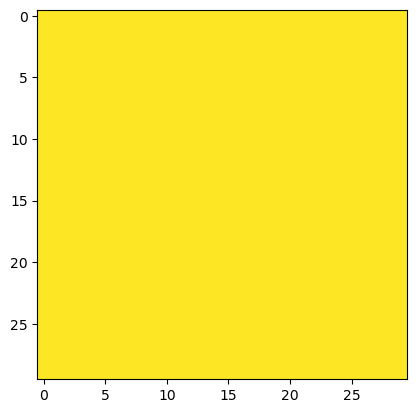

In [13]:
plt.imshow(straightened_image[:,:,10,0], vmin=0, vmax=1)


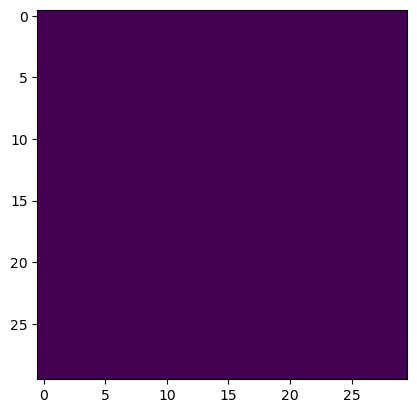

In [14]:
plt.imshow(rotated_image_final[:,:,10,0], vmin=0, vmax=1)

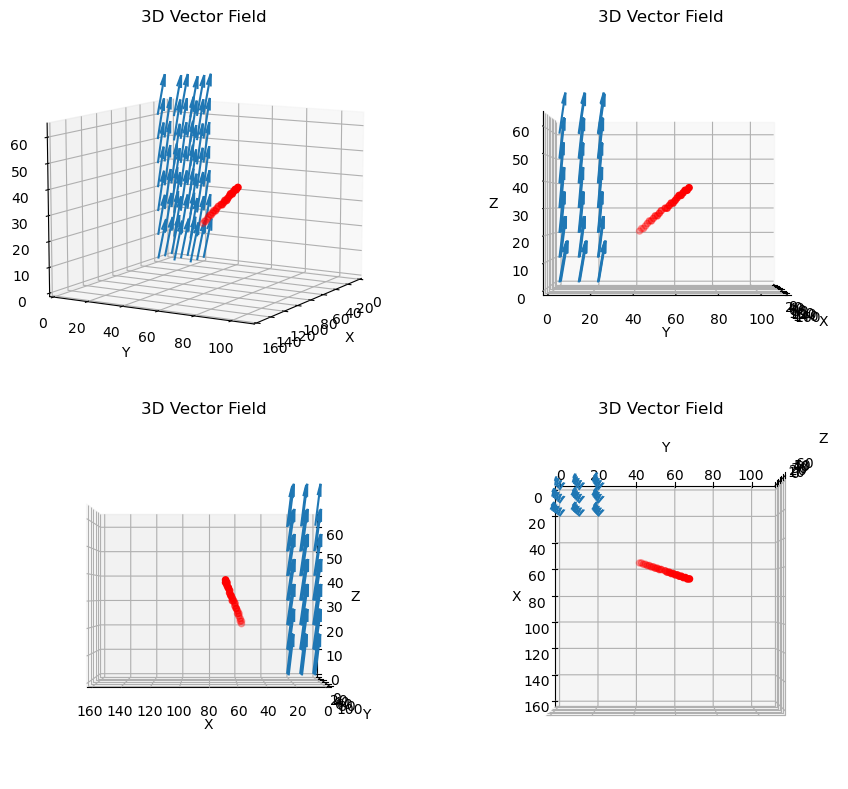

In [15]:

U = rotated_image_final[:,:,:,0]
V = rotated_image_final[:,:,:,1]
W = rotated_image_final[:,:,:,2]

# Define the subsampling rate
n = 10

# Create a subsampled meshgrid for the coordinates
x = np.linspace(0, rotated_image_final.shape[0] - 1, rotated_image_final.shape[0])[::n]
y = np.linspace(0, rotated_image_final.shape[1] - 1, rotated_image_final.shape[1])[::n]
z = np.linspace(0, rotated_image_final.shape[2] - 1, rotated_image_final.shape[2])[::n]
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# EXTRA: I am shifting the X component for more clarity ! 
#X = X + 50
#x = x + 50
# Subsample the vector components
U_sub = U[::n, ::n, ::n]
V_sub = V[::n, ::n, ::n]
W_sub = W[::n, ::n, ::n]

# Extracting x, y, z coordinates
x_p = points[:, 0]
y_p = points[:, 1]
z_p = points[:, 2]

# Function to set common properties
def set_common_properties(ax, elev, azim, a = 0):
    ax.quiver(X, Y, Z, U_sub, V_sub, W_sub, length=10, normalize=False)
    ax.scatter(x_p, y_p, z_p, c='r', marker='o')
    ax.set_title('3D Vector Field')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 160])
    ax.set_ylim([0, 110])
    ax.set_zlim([0, rotated_image_final.shape[2]])
    ax.view_init(elev, azim, a)

fig = plt.figure(figsize=(10, 8))

# 1st subplot: Default 3D view
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
set_common_properties(ax1, 10, 30)

# 2nd subplot: View Z,Y plane (rotate to see from the side)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
set_common_properties(ax2, 0, 0)

# 3rd subplot: View X,Z plane (rotate to see from the top)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
set_common_properties(ax3, 0, 90)

# 4th subplot: Another angle for better visualization
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
set_common_properties(ax4, 90,0 , 0)

plt.tight_layout()
plt.show()


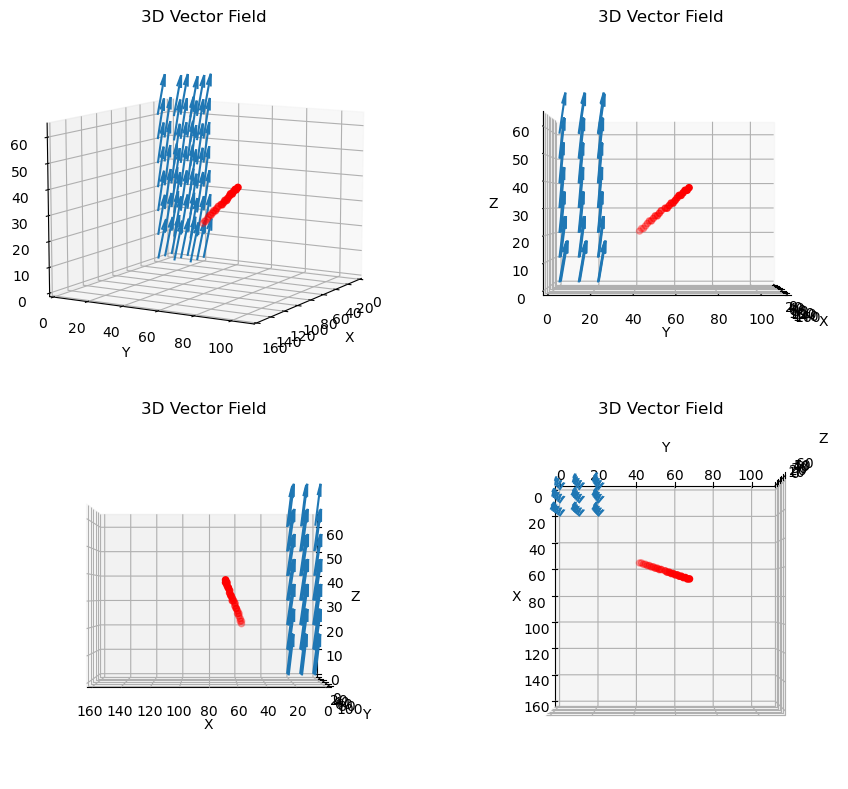

In [16]:

U = rotated_image_final[:,:,:,0]
V = rotated_image_final[:,:,:,1]
W = rotated_image_final[:,:,:,2]

# Define the subsampling rate
n = 10

# Create a subsampled meshgrid for the coordinates
x = np.linspace(0, rotated_image_final.shape[0] - 1, rotated_image_final.shape[0])[::n]
y = np.linspace(0, rotated_image_final.shape[1] - 1, rotated_image_final.shape[1])[::n]
z = np.linspace(0, rotated_image_final.shape[2] - 1, rotated_image_final.shape[2])[::n]
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# EXTRA: I am shifting the X component for more clarity ! 
#X = X + 50
#x = x + 50
# Subsample the vector components
U_sub = U[::n, ::n, ::n]
V_sub = V[::n, ::n, ::n]
W_sub = W[::n, ::n, ::n]

# Extracting x, y, z coordinates
x_p = points[:, 0]
y_p = points[:, 1]
z_p = points[:, 2]

# Function to set common properties
def set_common_properties(ax, elev, azim, a = 0):
    ax.quiver(X, Y, Z, U_sub, V_sub, W_sub, length=10, normalize=False)
    ax.scatter(x_p, y_p, z_p, c='r', marker='o')
    ax.set_title('3D Vector Field')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 160])
    ax.set_ylim([0, 110])
    ax.set_zlim([0, rotated_image_final.shape[2]])
    ax.view_init(elev, azim, a)

fig = plt.figure(figsize=(10, 8))

# 1st subplot: Default 3D view
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
set_common_properties(ax1, 10, 30)

# 2nd subplot: View Z,Y plane (rotate to see from the side)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
set_common_properties(ax2, 0, 0)

# 3rd subplot: View X,Z plane (rotate to see from the top)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
set_common_properties(ax3, 0, 90)

# 4th subplot: Another angle for better visualization
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
set_common_properties(ax4, 90,0 , 0)

plt.tight_layout()
plt.show()
